<a href="https://colab.research.google.com/github/imprntk/imprntk/blob/main/ANN_Implimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow-gpu


In [ ]:
pip install --upgrade pip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
#import some basic librasries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# we are trying to predict that the customer os going to exit the bank or not

#exited = Dependant feature and  remaining independant features

In [ ]:
## divide the dataset into dependant and independant features


X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
#categorical features = geography,gender
#we can use one hot encoding ,getdummies

In [ ]:
##feature enginerring

geography=pd.get_dummies(X['Geography'])
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
##concatenate these variable with dataframe

In [ ]:
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X=pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,False


In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,False


In [ ]:
X.drop(columns=['France'], inplace=True)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
#train with ANN
#spliting th dataset into training set and test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
 #Part 2 Now create ANN
#here you have to understand why we use tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
#itialize the ANN

classifier=Sequential()

In [ ]:
##adding the input layer meands adding dense (circles or neurons)

classifier.add(Dense(units=11,activation='relu'))
#meand i actually created input layes and nodes are 11 anf for next layer we use relu

In [ ]:
#adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [ ]:
#addinf second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
#adding the output layer

classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
#now entire newral network ready

In [ ]:
#now train my entire newral network

In [ ]:
#classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Q.where is learning rate
#bu default adam uses learning rate of 0.01

In [ ]:
#if you want provide your own learning rate

import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#train neural network

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,)

Epoch 1/1000
536/536 [==============================] - 4s 4ms/step - loss: 0.4358 - accuracy: 0.8141 - val_loss: 0.4209 - val_accuracy: 0.8220
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3949 - accuracy: 0.8401 - val_loss: 0.3751 - val_accuracy: 0.8440
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3570 - accuracy: 0.8589 - val_loss: 0.3653 - val_accuracy: 0.8542
Epoch 4/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3529 - accuracy: 0.8528 - val_loss: 0.3658 - val_accuracy: 0.8569
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3480 - accuracy: 0.8589 - val_loss: 0.3653 - val_accuracy: 0.8493
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3464 - accuracy: 0.8569 - val_loss: 0.3654 - val_accuracy: 0.8485
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3453 - accuracy: 0.8569 - val_loss: 0.3669 - val_accuracy:

KeyboardInterrupt: 

validation_soozze indiactes how many data you should validate based on batch size

In [ ]:
#Q.how many epochs basicaly we should add

In [ ]:
#assign callbacks      that means telling that you have to stop and you have to monitor this
#validation loss and if it does not improve then it will stop

In [ ]:
#Early stopping

#alwayes copy this and maybe change or play with this data
# keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     min_delta=0,
#     patience=0,
#     verbose=0,
#     mode="auto",
#     baseline=None,
#     restore_best_weights=False,
#     start_from_epoch=0,
# )

import tensorflow as tf

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
#callbacks showes what epoch it will  early stopping
#if validation loss does not improve much it will an=utomatically stop

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3343 - accuracy: 0.8625 - val_loss: 0.3577 - val_accuracy: 0.8527
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3311 - accuracy: 0.8640 - val_loss: 0.3655 - val_accuracy: 0.8501
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3299 - accuracy: 0.8643 - val_loss: 0.3580 - val_accuracy: 0.8565
Epoch 4/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3301 - accuracy: 0.8632 - val_loss: 0.3701 - val_accuracy: 0.8493
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3274 - accuracy: 0.8664 - val_loss: 0.3648 - val_accuracy: 0.8519
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3290 - accuracy: 0.8684 - val_loss: 0.3642 - val_accuracy: 0.8557
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3294 - accuracy: 0.8670 - val_loss: 0.3615 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

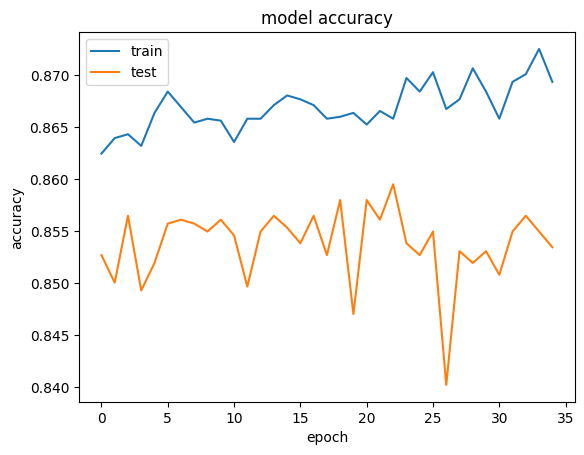

In [ ]:
#summerize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

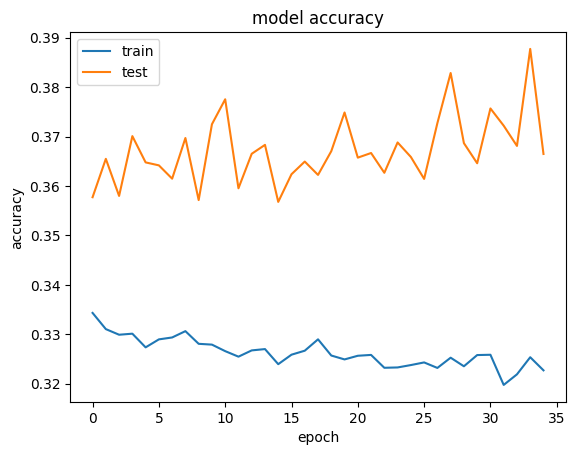

In [ ]:
#summerize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
#Part 3 - making the preddiction and evaluating the model

#prediction the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
#getting the true or false with respect to white and red

In [ ]:
#make the confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1534,   61],
       [ 212,  193]])

In [ ]:
#calculate the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.8635

In [ ]:
#get the weights

classifier.get_weights()

[array([[-0.2111248 , -1.0734793 , -0.40976757,  0.17215142, -0.03230732,
          0.2763984 , -0.33022687,  0.39526668, -0.3332559 ,  0.14802022,
         -0.3823025 ],
        [ 2.5645232 , -0.57061106, -3.0893059 , -3.117511  ,  0.23680456,
         -0.32376248,  0.02161139, -2.7744393 ,  1.5577203 , -2.8086884 ,
         -3.9356012 ],
        [ 0.53931934, -1.0927789 ,  0.7757721 , -0.00475139, -0.12430272,
          0.24809623,  0.23747447,  0.7070051 ,  0.59534824,  1.1306485 ,
         -0.4782039 ],
        [-0.09935308, -1.1457715 ,  1.5067846 , -1.3017904 ,  1.6616482 ,
         -4.356786  ,  1.3073598 ,  1.9912068 ,  0.8844378 ,  0.5291105 ,
          0.8406996 ],
        [-0.46897647,  1.8866403 ,  0.3529827 , -2.0235243 ,  4.190355  ,
          0.58551425,  0.37882516, -2.6506534 , -4.120997  ,  0.31847242,
          0.39243487],
        [ 0.13037841, -0.2710187 ,  0.77873826,  1.2236006 , -0.17908277,
         -0.5032397 , -0.22520223,  0.72880805, -0.3675632 , -0.3387403

In [ ]:
#where to use Dropout

#adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
#addinf second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))